<a href="https://colab.research.google.com/github/nonoumasy/Japan-Population-1872-2015/blob/master/Japan_Population_1872_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install geopandas
!pip install -U pandas
!pip install -U plotly

In [0]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as py
%matplotlib inline

In [0]:
df = pd.read_csv('Japan_population_data.csv')

In [5]:
df.sample(2)

,prefecture,year,population,capital,region,estimated_area,island
2093,Shizuoka,1892.9167,1105875.0,Shizuoka-shi,Chubu,7780.50,Honshu
1388,Miyazaki,1960.7500,1134590.0,Miyazaki-shi,Kyushu,7735.99,Kyushu


In [0]:
#get some data
df = pd.read_csv('Japan_population_data.csv')

#select 2015.75 year and reset index
df['year'] = df.year.astype(int)

df.drop_duplicates(subset = ['prefecture', 'year'], keep='first', inplace=True)
df.reset_index(inplace=True)

#japan prefecture geojson
japan_gdf = gpd.read_file('japan_prefectures.geojson')

#edit japan geojson
japan_gdf = japan_gdf[['name_1', 'geometry' ]]

#replace special characters
japan_gdf.name_1.replace('Hyōgo', 'Hyogo', inplace=True)
japan_gdf.name_1.replace('Naoasaki', 'Nagasaki', inplace=True)

#clean up prefecture column
df['prefecture'] = df.prefecture.str.split('-', expand=True)[0]

In [7]:
pd.pivot_table(data=df,
               index='year',
               columns=['region','prefecture'],
               values='population').style.background_gradient(axis=1).format("{:.0f}")

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less



In [0]:
fig = px.bar(x='population',
              y='prefecture',
              color='region',
              data_frame=df, 
              hover_name='prefecture',
              animation_frame='year',
              orientation='h',
              color_continuous_scale='Viridis',
              range_x=(50000, 16000000),
              title='Population of Japan by Prefecture 1872-2015',
              template='plotly_dark',
              height=900,
             )

py.offline.plot(fig, filename='japan_pop.html')
fig.show()

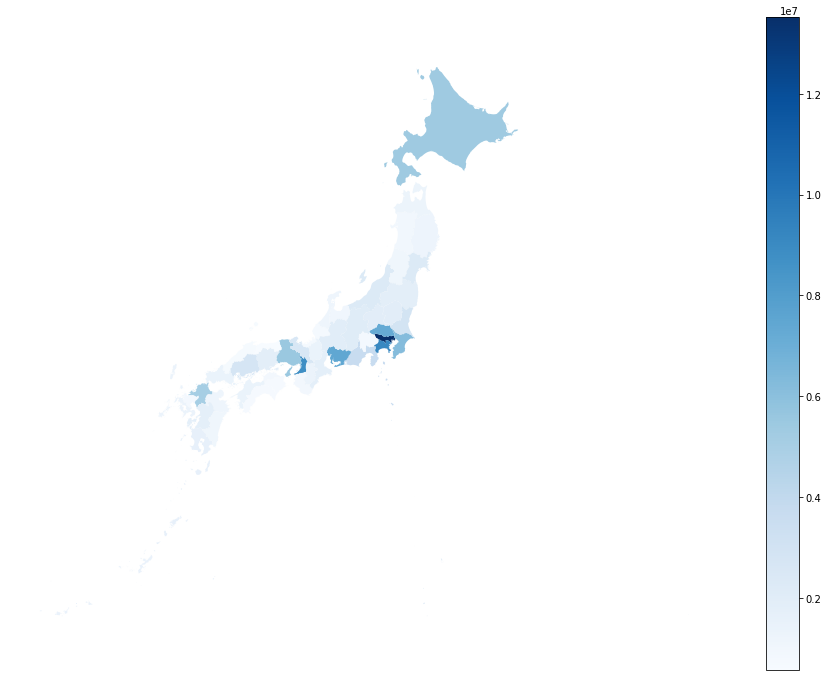

In [33]:
#
df_2015 = df[df.year == 2015].reset_index(drop=True)

#
merged_df = pd.merge(japan_gdf, df_2015, left_on='name_1', right_on='prefecture')

merged_df.to_crs(epsg = 3857).plot(column='population', legend=True, figsize=(16,12), cmap='Blues')
plt.axis('off');